Задание
Цель:
Изучить применение моделей кластеризации
Описание задания:
В домашнем задании нужно сократить число цветов в палитре изображения. Картинку для выполнения работы можно выбрать любую, главное условие – наличие на ней разных цветов, для того, чтобы результат работы моделей был заметен.
Для выполнения работы необходимо выделить кластеры в пространстве RGB, объекты соответствуют пикселям изображения. После выделения кластеров все пиксели, отнесенные в один кластер, заполняются одним цветом. Цвет – центроид соответствующего кластера.
Этапы работы:

1. Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).
a) Для отображения картинки воспользуйтесь вспомогательной функцией:
import matplotlib.pyplot as plt
import cv2
import skimage
def draw_picture(image, title, bgr=False):
b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
new_image = cv2.merge([r, g, b])
plt.figure(figsize=(7, 5))
plt.axis(‘off’)
plt.imshow(new_image)
plt.title(title)
plt.show()
b) Для загрузки картинки можно использовать код:
img = cv.imread(path)
2. Реализуйте три модели кластеризации:
a) KMeans. Рассмотрите число кластеров K = 2, 5, 10, 20.
b) DBSCAN
c) AgglomerativeClustering. Рассмотрите число кластеров K = 2, 5, 10, 20.
3. Для каждой модели оцените потери от уменьшения цветов при помощи метрики SSIM.
4. Сформулируйте выводы по проделанной работе.
a) Какая модель показала лучший результат?
Для получения зачета по этому домашнему заданию минимально должно быть реализовано обучение трех моделей с одним и тем же значением кластеров, где такой параметр присутствует.

In [1]:
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from skimage.metrics import structural_similarity as ssim
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import adjusted_rand_score, silhouette_score


In [2]:
def draw_picture(image, title, bgr=False):
    b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.title(title)
    plt.show()

In [3]:
img = cv2.imread('Data/Clustering algorithms.jpg')

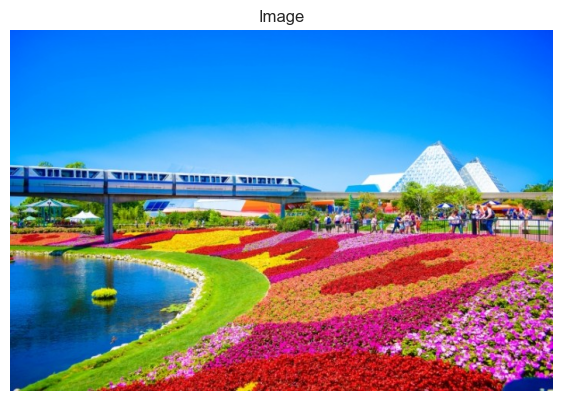

In [4]:
a = draw_picture(img, 'Image')
a

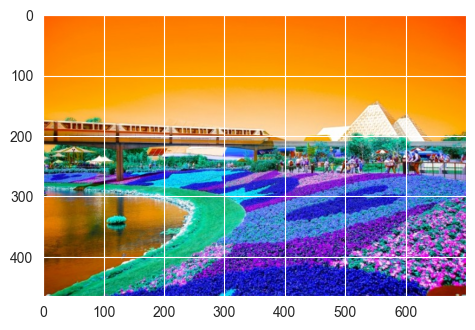

In [5]:
plt.figure(figsize=(12,9))
plt.subplot(121)
plt.imshow(img)
plt.show()

In [6]:
img

array([[[255,  92,   0],
        [255,  92,   0],
        [253,  93,   0],
        ...,
        [246,  73,   0],
        [246,  73,   0],
        [245,  72,   0]],

       [[255,  92,   0],
        [255,  92,   0],
        [253,  93,   0],
        ...,
        [246,  73,   0],
        [246,  73,   0],
        [246,  73,   0]],

       [[254,  94,   0],
        [253,  93,   0],
        [253,  93,   0],
        ...,
        [246,  73,   0],
        [246,  73,   0],
        [246,  73,   0]],

       ...,

       [[133,  50,   0],
        [134,  51,   0],
        [132,  48,   0],
        ...,
        [108,  64,  57],
        [113,  68,  55],
        [111,  65,  48]],

       [[127,  48,   0],
        [127,  48,   0],
        [133,  50,   5],
        ...,
        [148, 161, 153],
        [150, 160, 148],
        [144, 155, 139]],

       [[131,  54,   5],
        [121,  43,   0],
        [122,  38,   0],
        ...,
        [172, 213, 205],
        [175, 213, 201],
        [171, 210, 195]]

In [7]:
img.shape

(466, 700, 3)

In [8]:
image = img.reshape((-1,3))
image.shape

(326200, 3)

In [9]:
image

array([[255,  92,   0],
       [255,  92,   0],
       [253,  93,   0],
       ...,
       [172, 213, 205],
       [175, 213, 201],
       [171, 210, 195]], dtype=uint8)

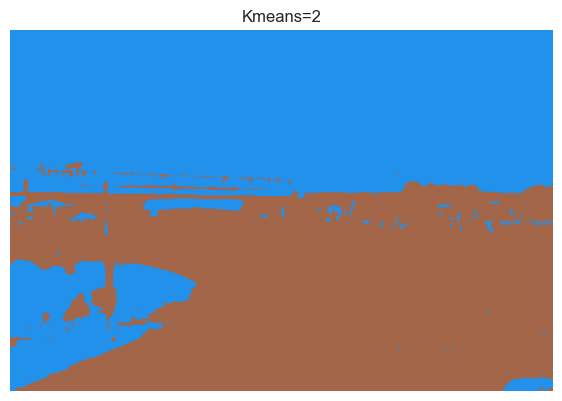

Потери от уменьшения цветов SSIM = 0.3655491250910141 при количестве кластеров равном 2


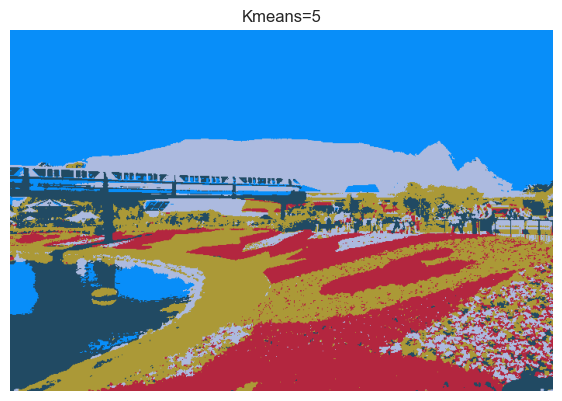

Потери от уменьшения цветов SSIM = 0.5095808346533134 при количестве кластеров равном 5


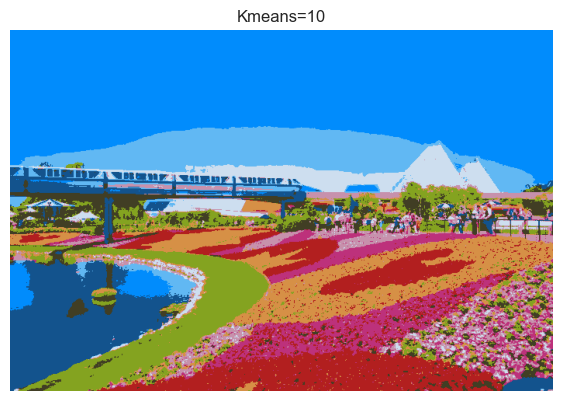

Потери от уменьшения цветов SSIM = 0.7006382732617888 при количестве кластеров равном 10


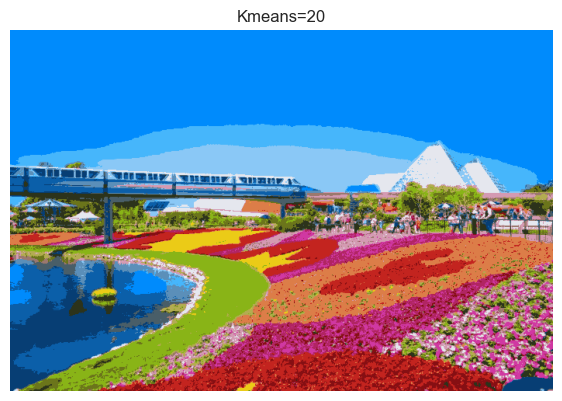

Потери от уменьшения цветов SSIM = 0.784170389157346 при количестве кластеров равном 20


In [10]:
# convert to np.float32
Z = np.float32(image)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = [2, 5, 10, 20]
for i in K:
    ret,label,center=cv2.kmeans(Z,i,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))
    kmins_image = draw_picture(res2, f'Kmeans={i}')
    kmins_image
    print(f'Потери от уменьшения цветов SSIM = {ssim(img, res2, channel_axis=2)} при количестве кластеров равном {i}')


In [11]:
img_с = cv2.resize(img, (128, 128))

In [12]:
img_с.shape

(128, 128, 3)

In [13]:
img_с = img_с.reshape(-1, 3)

In [14]:
img_с.shape

(16384, 3)

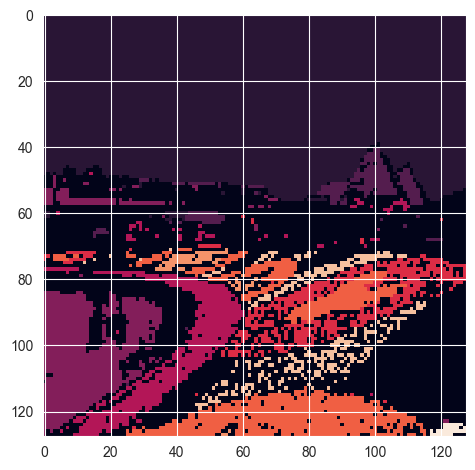

Потери от уменьшения цветов SSIM = 0.01848902621729977


In [44]:
dbscan = DBSCAN(eps=10, min_samples=25)
dbscan.fit(img_с)
labels_clast = dbscan.fit_predict(img_с)
labels_clast = labels_clast.reshape((128, 128))
a = np.array(labels_clast,np.uint8)
plt.figure(figsize=(12,9))
plt.subplot(121)
plt.imshow(labels_clast)
plt.show()
b = cv2.resize(img_с, (128,128))
print(f'Потери от уменьшения цветов SSIM = {ssim(b, a)}')

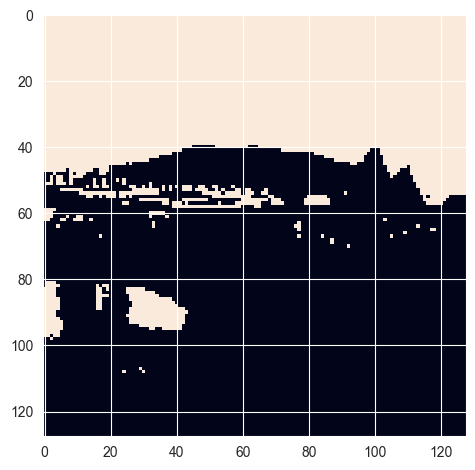

Потери от уменьшения цветов SSIM = 0.03622567840064706 при количестве кластеров равном 2


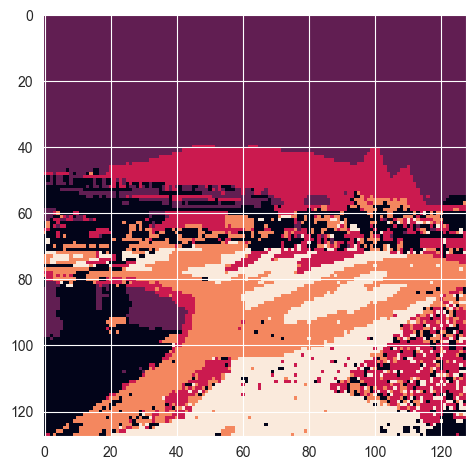

Потери от уменьшения цветов SSIM = 0.04357421540975885 при количестве кластеров равном 5


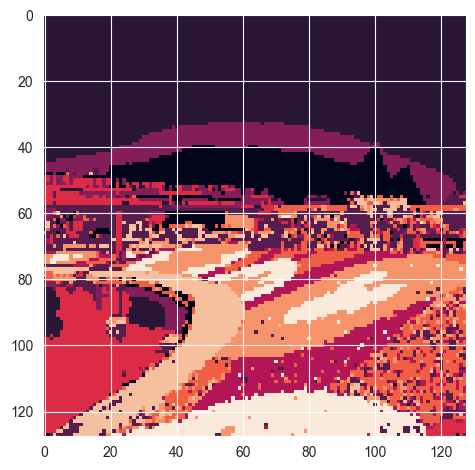

Потери от уменьшения цветов SSIM = 0.0531544067398724 при количестве кластеров равном 10


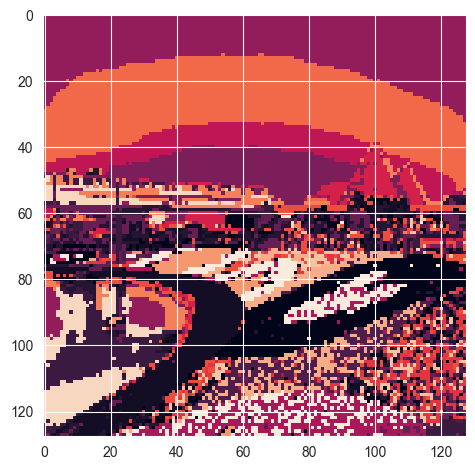

Потери от уменьшения цветов SSIM = 0.0593848050338156 при количестве кластеров равном 20


In [52]:
K = [2, 5, 10, 20]
for i in K:
    clustering = AgglomerativeClustering(n_clusters=i).fit(img_с)
    segmented_image = clustering.fit_predict(img_с)
    segmented_image = segmented_image.reshape((128, 128))
    a = np.array(segmented_image,np.uint8)
    plt.figure(figsize=(12,9))
    plt.subplot(121)
    plt.imshow(segmented_image)
    plt.show()
    b = cv2.resize(img_с, (128,128))
    print(f'Потери от уменьшения цветов SSIM = {ssim(b, segmented_image)} при количестве кластеров равном {i}')